# Explore here

In [73]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np


total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")

total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [74]:
total_data.shape

(768, 9)

In [75]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


existe un total de 768 filas y 9 columnas, no se aprecia que las columnas tengan nulos.

por otra parte, tenemos que todas las variables son numericas.

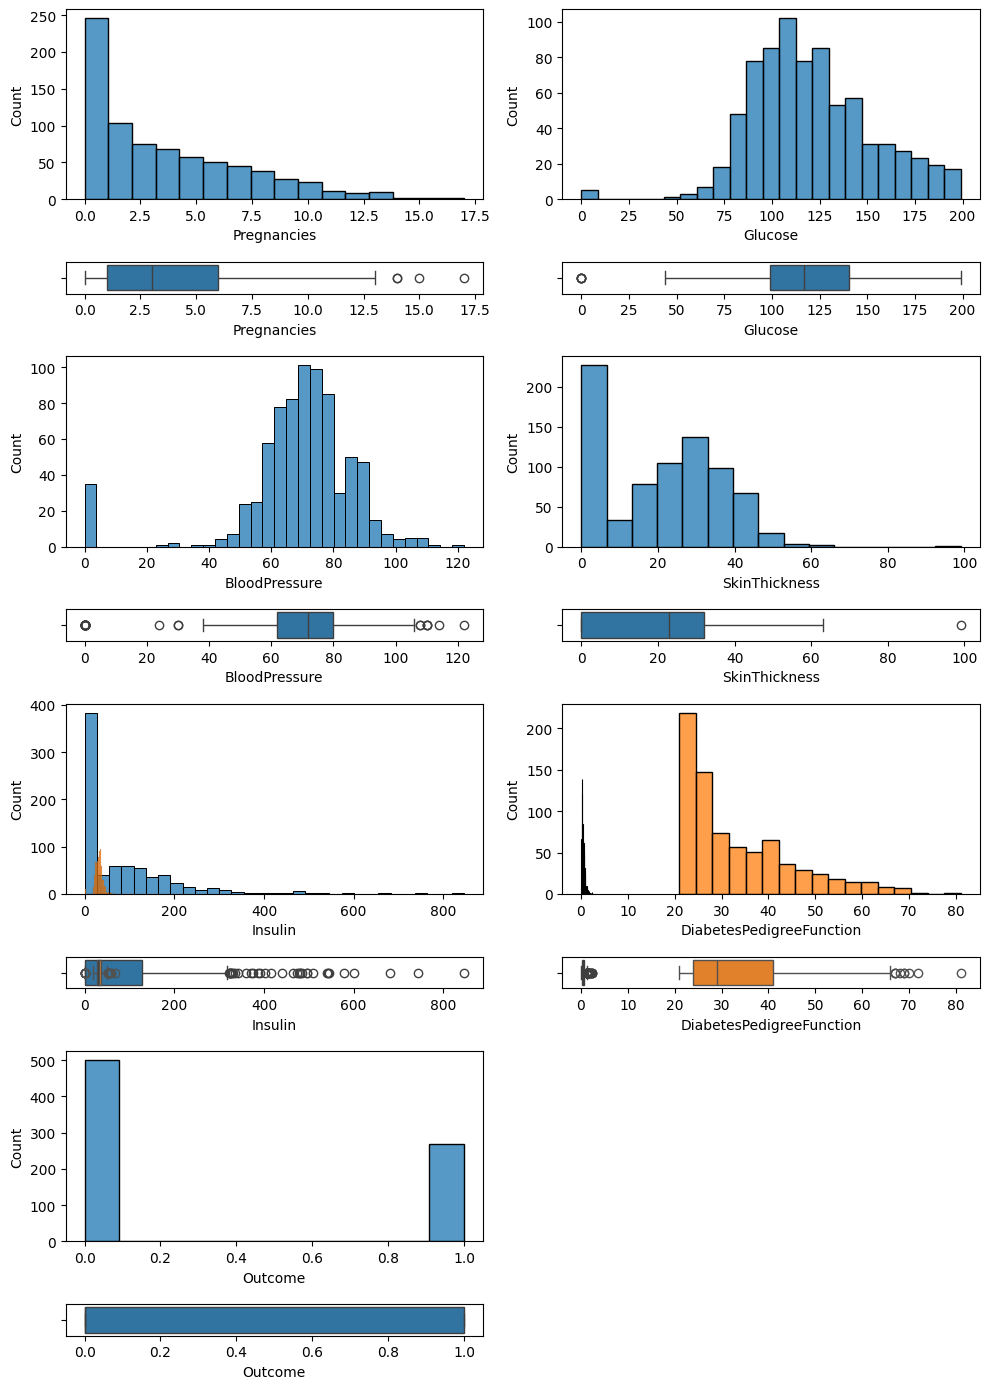

In [76]:
fig, axis = plt.subplots(8, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1,6,1,6,1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_data, x = "Pregnancies")
sns.boxplot(ax = axis[1, 0], data = total_data, x = "Pregnancies")

sns.histplot(ax = axis[0, 1], data = total_data, x = "Glucose")
sns.boxplot(ax = axis[1, 1], data = total_data, x = "Glucose")

sns.histplot(ax = axis[2, 0], data = total_data, x = "BloodPressure")
sns.boxplot(ax = axis[3, 0], data = total_data, x = "BloodPressure")

sns.histplot(ax = axis[2, 1], data = total_data, x = "SkinThickness")
sns.boxplot(ax = axis[3, 1], data = total_data, x = "SkinThickness")

sns.histplot(ax = axis[4, 0], data = total_data, x = "Insulin")
sns.boxplot(ax = axis[5, 0], data = total_data, x = "Insulin")

sns.histplot(ax = axis[4, 0], data = total_data, x = "BMI")
sns.boxplot(ax = axis[5, 0], data = total_data, x = "BMI")

sns.histplot(ax = axis[4, 1], data = total_data, x = "DiabetesPedigreeFunction")
sns.boxplot(ax = axis[5, 1], data = total_data, x = "DiabetesPedigreeFunction")

sns.histplot(ax = axis[4, 1], data = total_data, x = "Age")
sns.boxplot(ax = axis[5, 1], data = total_data, x = "Age")

sns.histplot(ax = axis[6, 0], data = total_data, x = "Outcome")
sns.boxplot(ax = axis[7, 0], data = total_data, x = "Outcome")


fig.delaxes(axis[6, 1])
fig.delaxes(axis[7, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Analisis de variables multivariante

Analisis numérico-numérico

In [77]:
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


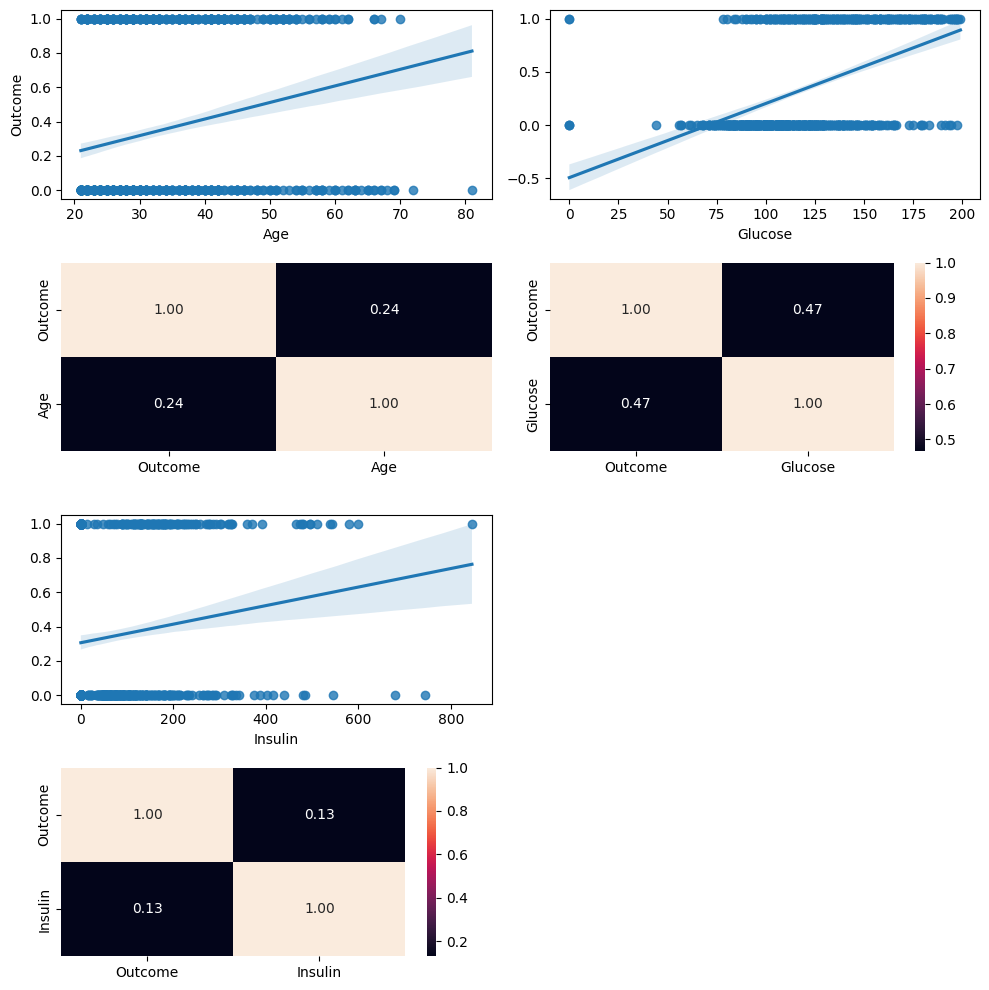

In [78]:
fig, axis = plt.subplots(4, 2, figsize = (10, 10))

sns.regplot(ax = axis[0, 0], data = total_data, x = "Age", y = "Outcome")
sns.heatmap(total_data[["Outcome", "Age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_data, x = "Glucose", y = "Outcome").set(ylabel = None)
sns.heatmap(total_data[["Outcome", "Glucose"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = total_data, x = "Insulin", y = "Outcome").set(ylabel = None)
sns.heatmap(total_data[["Outcome", "Insulin"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])

fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Se puede visualizar en las graficas que no existe correlacion entre las variables numericas vitas con respecto a Outcome

Combinaciones de la clase con varias predictoras

In [79]:
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


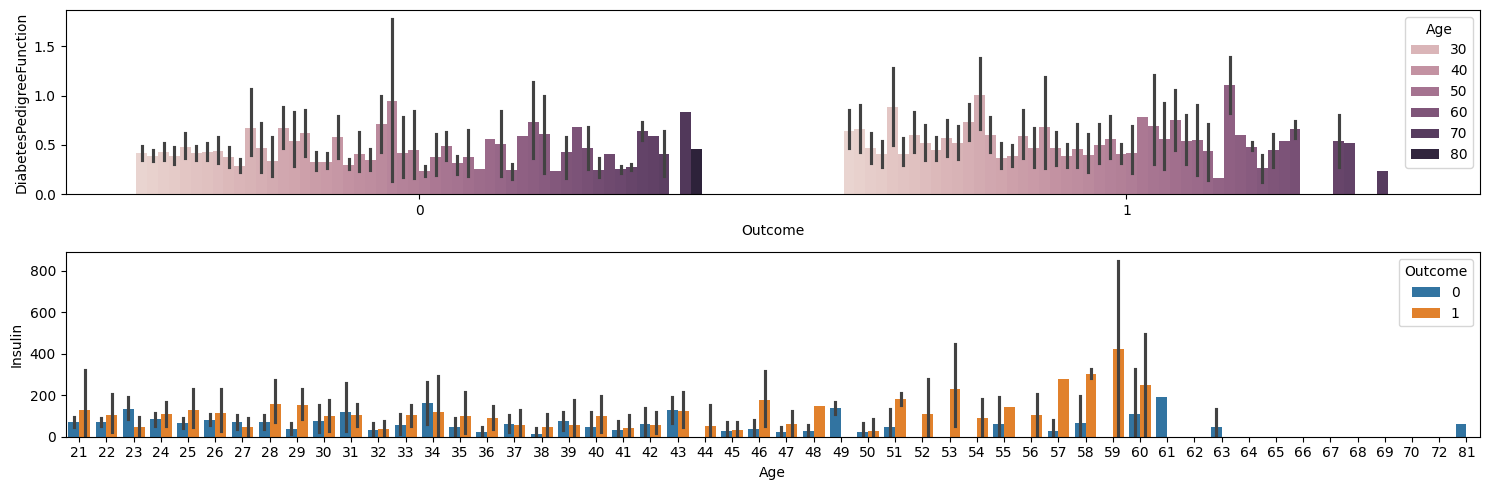

In [80]:
fig, axis = plt.subplots(2, 1, figsize = (15, 5))

sns.barplot(ax = axis[0], data = total_data, x = "Outcome", y = "DiabetesPedigreeFunction", hue = "Age")
sns.barplot(ax = axis[1], data = total_data, x = "Age", y = "Insulin", hue = "Outcome")


plt.tight_layout()

plt.show()

In [81]:
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


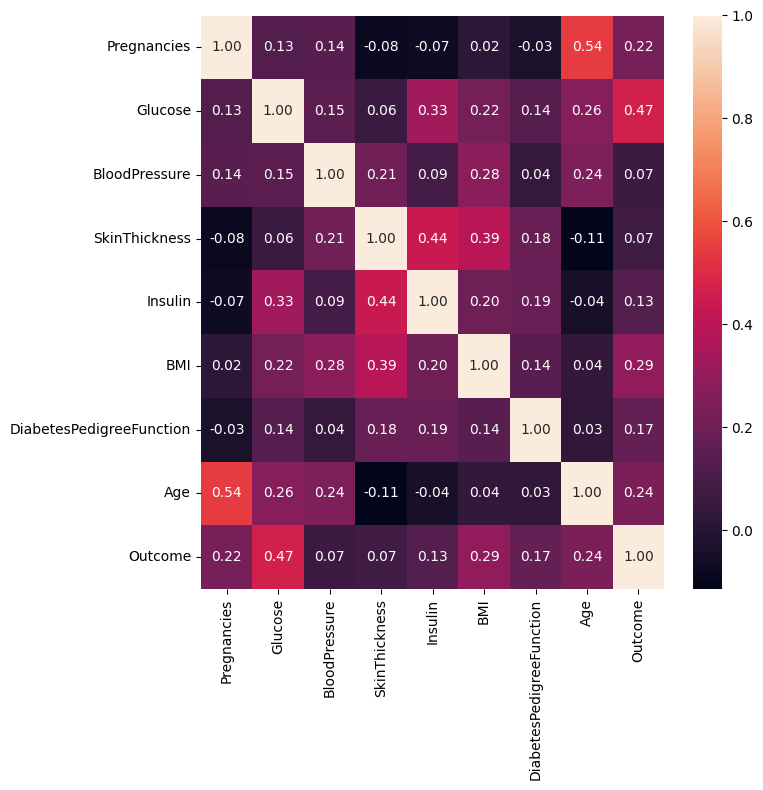

In [82]:
fig, axes = plt.subplots(figsize=(8, 8))

sns.heatmap(total_data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",	
                        "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]].corr(), annot = True, fmt = ".2f")


plt.tight_layout()

# Draw Plot
plt.show()

Ingenieria de caracteristicas

valores atipicos

In [83]:
total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


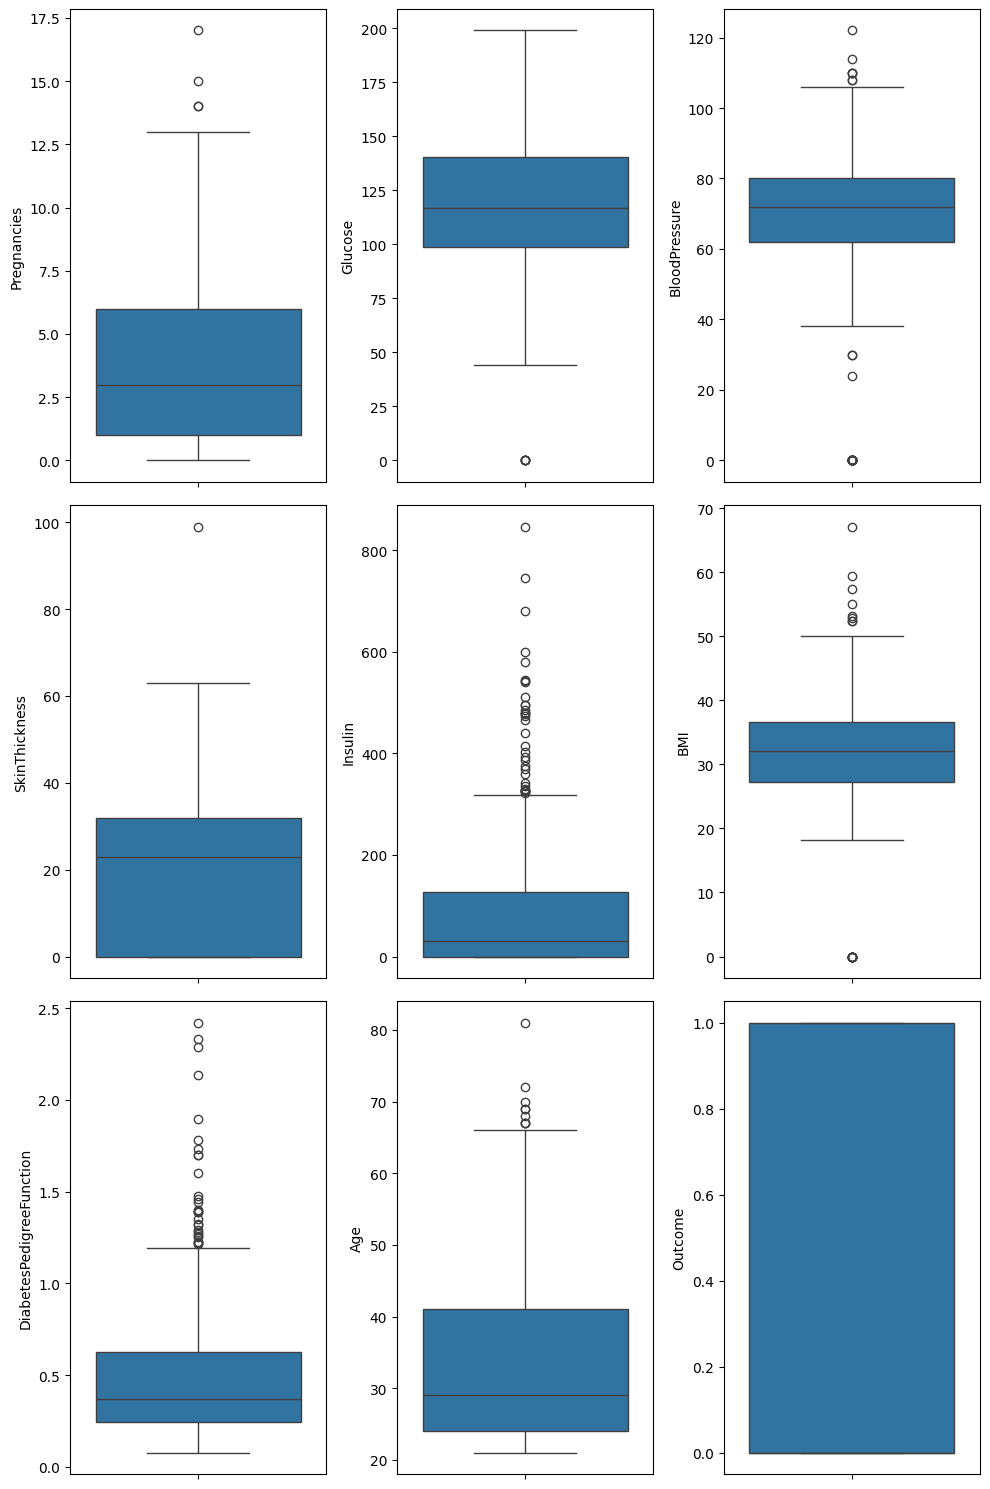

In [84]:
fig, axes = plt.subplots(3, 3, figsize = (10, 15))

sns.boxplot(ax = axes[0, 0], data = total_data, y = "Pregnancies")
sns.boxplot(ax = axes[0, 1], data = total_data, y = "Glucose")
sns.boxplot(ax = axes[0, 2], data = total_data, y = "BloodPressure")
sns.boxplot(ax = axes[1, 0], data = total_data, y = "SkinThickness")
sns.boxplot(ax = axes[1, 1], data = total_data, y = "Insulin")
sns.boxplot(ax = axes[1, 2], data = total_data, y = "BMI")
sns.boxplot(ax = axes[2, 0], data = total_data, y = "DiabetesPedigreeFunction")
sns.boxplot(ax = axes[2, 1], data = total_data, y = "Age")
sns.boxplot(ax = axes[2, 2], data = total_data, y = "Outcome")

#fig.delaxes(axes[3, 1])
#fig.delaxes(axes[3, 2])

plt.tight_layout()

plt.show()

Deteccion de valores atipicos.

In [85]:
data_CON_outliers = total_data.copy()

data_SIN_outliers = total_data.copy()
# Para cada una de las variables con outliers en mi problema, tengo que reemplazar sus valores del DF

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(df[column])
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in ["Pregnancies",	"Glucose",	"BloodPressure",	"SkinThickness",	"Insulin",	"BMI",	"DiabetesPedigreeFunction", "Age"	]:
  data_SIN_outliers, limit_list = replace_outliers_from_column(column, data_SIN_outliers)
  outliers_dict[column] = limit_list

outliers_dict

{'Pregnancies': [0, np.float64(13.5)],
 'Glucose': [np.float64(37.125), np.float64(202.125)],
 'BloodPressure': [np.float64(35.0), np.float64(107.0)],
 'SkinThickness': [0, np.float64(80.0)],
 'Insulin': [0, np.float64(318.125)],
 'BMI': [np.float64(13.35), np.float64(50.550000000000004)],
 'DiabetesPedigreeFunction': [0.078, np.float64(1.2)],
 'Age': [21, np.float64(66.5)]}

In [86]:
data_CON_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [87]:
data_SIN_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1


In [88]:
data_CON_outliers.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [89]:
data_SIN_outliers.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Obtencion de porcentajes por columnas de datos vacios (para posibles futuros casos)

In [90]:
total_data.isnull().sum().sort_values(ascending=False) / len(total_data)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

Escalado de valores

In [91]:
from sklearn.model_selection import train_test_split

num_variables = ["Pregnancies", "Glucose", "DiabetesPedigreeFunction", "Age",
                 "BloodPressure", "SkinThickness", "Insulin", "BMI"]



# Dividimos el conjunto de datos en muestras de train y test
X_CON = data_CON_outliers.drop("Outcome", axis = 1)[num_variables]
y = data_CON_outliers["Outcome"]
X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_CON, y, test_size = 0.2, random_state = 42)

X_SIN = data_SIN_outliers.drop("Outcome", axis = 1)[num_variables]
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_SIN, test_size = 0.2, random_state = 42)

X_train_con_outliers.head()

,Pregnancies,Glucose,DiabetesPedigreeFunction,Age,BloodPressure,SkinThickness,Insulin,BMI
60,2,84,0.304,21,0,0,0,0.0
618,9,112,1.282,50,82,24,0,28.2
346,1,139,0.654,22,46,19,83,28.7
294,0,161,0.254,65,50,0,0,21.9
231,6,134,0.238,46,80,37,370,46.2


Normalización


In [92]:
from sklearn.preprocessing import StandardScaler
import pickle

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)


### NORMALIZAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

X_train_con_outliers_norm.head()

,Pregnancies,Glucose,DiabetesPedigreeFunction,Age,BloodPressure,SkinThickness,Insulin,BMI
60,-0.526397,-1.151398,-0.490735,-1.035940,-3.752683,-1.322774,-0.701206,-4.135256
618,1.588046,-0.276643,2.415030,1.487101,0.680345,0.233505,-0.701206,-0.489169
346,-0.828460,0.566871,0.549161,-0.948939,-1.265862,-0.090720,0.013448,-0.424522
294,-1.130523,1.254179,-0.639291,2.792122,-1.049617,-1.322774,-0.701206,-1.303720
231,0.681856,0.410665,-0.686829,1.139095,0.572222,1.076490,2.484601,1.838121


In [93]:
from sklearn.preprocessing import MinMaxScaler

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = num_variables)


### ESCALAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = MinMaxScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = num_variables)

X_train_con_outliers_scal.head()

,Pregnancies,Glucose,DiabetesPedigreeFunction,Age,BloodPressure,SkinThickness,Insulin,BMI
60,0.117647,0.422111,0.096499,0.000000,0.000000,0.000000,0.000000,0.000000
618,0.529412,0.562814,0.514091,0.483333,0.672131,0.380952,0.000000,0.420268
346,0.058824,0.698492,0.245944,0.016667,0.377049,0.301587,0.098109,0.427720
294,0.000000,0.809045,0.075149,0.733333,0.409836,0.000000,0.000000,0.326379
231,0.352941,0.673367,0.068318,0.416667,0.655738,0.587302,0.437352,0.688525


In [94]:
!pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [95]:
X_train_con_outliers.to_excel("../data/processed/X_train_con_outliers.xlsx", index = False)
X_train_sin_outliers.to_excel("../data/processed/X_train_sin_outliers.xlsx", index = False)
X_train_con_outliers_norm.to_excel("../data/processed/X_train_con_outliers_norm.xlsx", index = False)
X_train_sin_outliers_norm.to_excel("../data/processed/X_train_sin_outliers_norm.xlsx", index = False)
X_train_con_outliers_scal.to_excel("../data/processed/X_train_con_outliers_scal.xlsx", index = False)
X_train_sin_outliers_scal.to_excel("../data/processed/X_train_sin_outliers_scal.xlsx", index = False)

X_test_con_outliers.to_excel("../data/processed/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel("../data/processed/X_test_sin_outliers.xlsx", index = False)
X_test_con_outliers_norm.to_excel("../data/processed/X_test_con_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel("../data/processed/X_test_sin_outliers_norm.xlsx", index = False)
X_test_con_outliers_scal.to_excel("../data/processed/X_test_con_outliers_scal.xlsx", index = False)
X_test_sin_outliers_scal.to_excel("../data/processed/X_test_sin_outliers_scal.xlsx", index = False)

y_train.to_excel("../data/processed/y_train.xlsx", index = False)
y_test.to_excel("../data/processed/y_test.xlsx", index = False)

with open("../models/normalizador_con_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_con_outliers, file)

with open("../models/normalizador_sin_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_sin_outliers, file)

with open("../models/scaler_con_outliers.pkl", "wb") as file:
  pickle.dump(scaler_con_outliers, file)

with open("../models/scaler_sin_outliers.pkl", "wb") as file:
  pickle.dump(scaler_sin_outliers, file)

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

results = []
models = []
for dataset in [
    X_train_con_outliers,
    X_train_sin_outliers,
    X_train_con_outliers_norm,
    X_train_sin_outliers_norm,
    X_train_con_outliers_scal,
    X_train_sin_outliers_scal,
]:
  model = DecisionTreeClassifier(random_state = 42) # Modelo base
  model.fit(dataset, y_train)
  y_pred = model.predict(dataset)
  results.append(accuracy_score(y_train, y_pred))
  models.append(model)

print(results)
max(results)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


1.0

In [97]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train_con_outliers, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


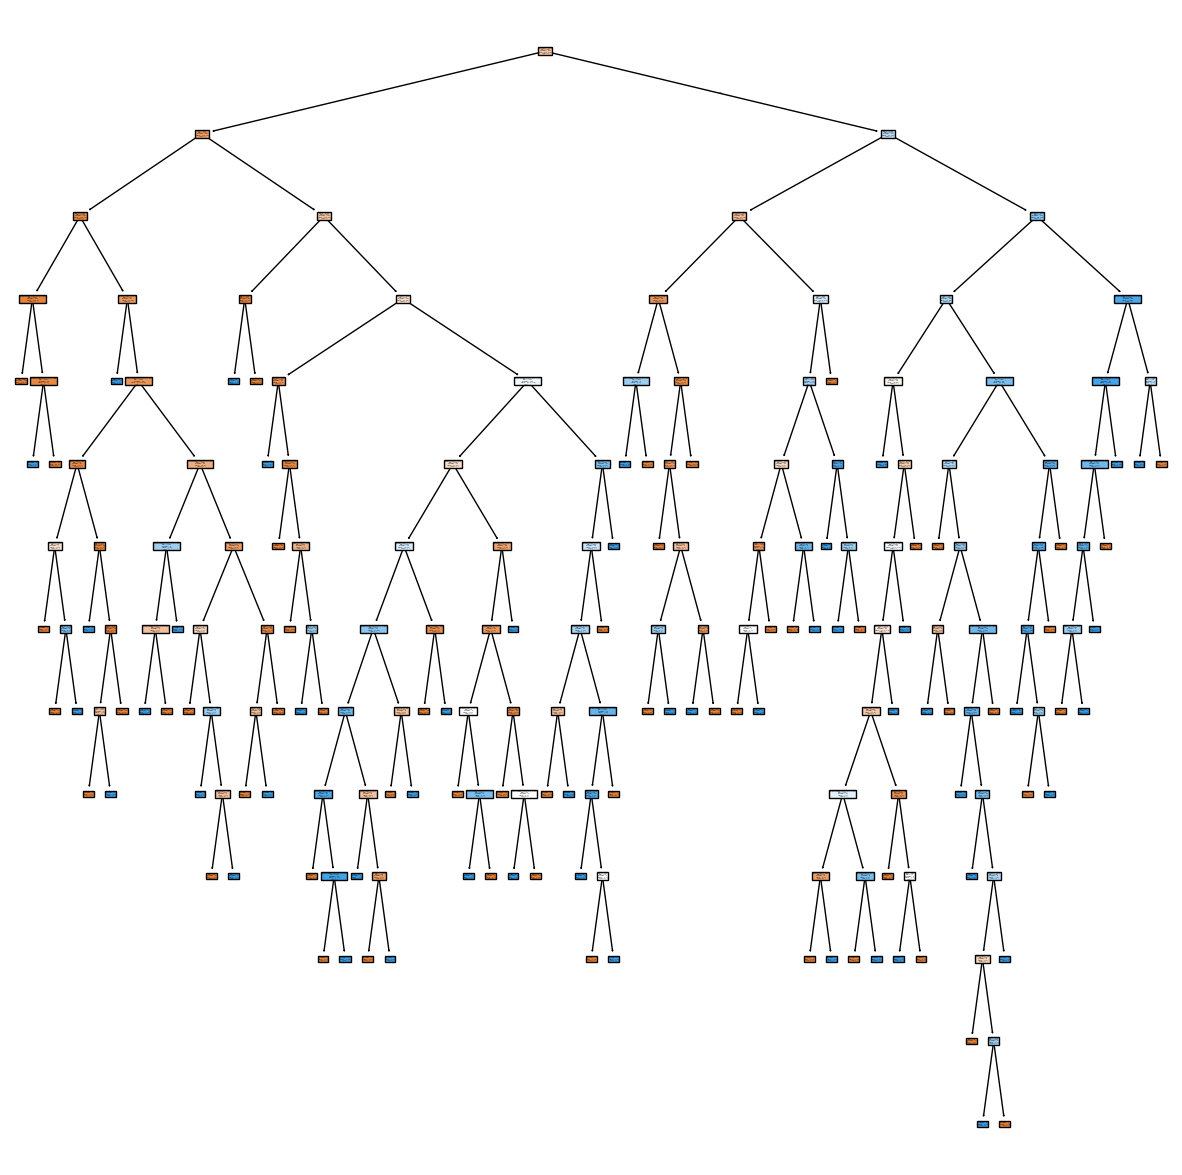

In [98]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train_con_outliers.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()